In [1]:
import SimpleITK as sitk
# from downloaddata import fetch_data as fdata
from extensies import preprocessing as my
from extensies import normalization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Load findings and informations about images

In [2]:
df_images = pd.read_csv('../../data/info/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('../../data/info/ProstateX-Findings-Train.csv')
df_ktrans = pd.read_csv('../../data/info/ProstateX-Images-KTrans-Train.csv')

In [18]:
root_path = '../../data/PROSTATEx'
path_to_data = '../../data/'
modality = 'ktrans'
new_spacing = (1,1,1)
orientation = 's'
patch_size = (20,20,1)
images = []


target_path = os.path.join(path_to_data,modality,orientation, 
                            str(patch_size[0]) + 'x' + str(patch_size[1]) + 'x' + str(patch_size[2]))

# x = 1.5
# offsets = [[0,0,0],[-x,x,x],[x,x,x],[-x,-x,x],[x,-x,x],
#             [-x,x,0],[x,x,0],[-x,-x,0],[x,-x,0],[-x,x,-x],[x,x,-x],[-x,-x,-x],[x,-x,-x]]
offsets = [[0,0,0]]



new_df = pd.DataFrame(columns = ['ProxID','fid','zone','ClinSig','name'])
roi_volumes = []
# findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,84,110,131,145,176,179,215,230,264,265,268,275,292,304]])
# findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,44,45,84,110,131,145,176,179,215,230,264,265,268,275,292,304]])
findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,5,44,45,46,64,
                                               81,84,87,110,114,131,145,162,176,179,190,193,215,230,246,264,265,268,275,292,304,325]])
findings = findings[findings['zone'] != 'SV']

# iterate throught all findings
index = 0
for idx,row in findings[:30].iterrows():
    print(idx)

    if modality == 'ktrans':
        path_to_image = my.get_ktrans_path(row['ProxID'],path_to_data)
        image = sitk.ReadImage(path_to_image)
    else:
        path_to_image = my.get_path(row['ProxID'], modality, root_path)
        fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
        image = sitk.ReadImage(fixed_series_filenames)

    # fit normalizer
    normalizer = normalization.ScaleNormalization()
    normalizer.fit(sitk.GetArrayFromImage(image))
    # resample image to same spacing in all directions
    image = my.resample_image_to_spacing(image, new_spacing, sitk.sitkLinear)
    # extract region of interest
    center = [float(x) for x in row['pos'].split()] 
    for i,offset in enumerate(offsets):
        volume  = my.get_patch_from_image(image, patch_size, center, orientation)
        # normalise data
        volume = normalizer.normalise(volume)

        #save image
        file_name = row['ProxID']+'_'+str(index)+'_'+row['zone']+'.nii'
        new_df.loc[index] = row[['ProxID','fid','zone','ClinSig']]
        new_df.loc[index,'name'] = file_name
        new_df.loc[index,'ID'] = idx
        new_df.loc[index,'normalization'] = normalizer.name
        print(volume.shape)
        images.append(volume)

        index += 1

# new_df.to_csv(os.path.join(target_path,'info.csv'))

0
(20, 20)
1
(20, 20)
2
(20, 20)
3
(20, 20)
4
(20, 20)
6
(20, 20)
7
(20, 20)
8
(20, 20)
9
(20, 20)
10
(20, 20)
11
(20, 20)
12
(20, 20)
13
(20, 20)
14
(20, 20)
15
(20, 20)
16
(20, 20)
17
(20, 20)
18
(20, 20)
19
(20, 20)
20
(20, 20)
21
(20, 20)
22
(20, 20)
23
(20, 20)
24
(20, 20)
25
(20, 20)
26
(20, 20)
27
(20, 20)
28
(20, 20)
29
(20, 20)
30
(20, 20)


In [4]:
images = np.array(images)

In [8]:
images.shape

(296,)

In [68]:
def get_images(modality = 't2tsetra', orientation = 't'):
    root_path = '../../data/PROSTATEx'
    path_to_data = '../../data/'
    new_spacing = (1,1,1)
    patch_size = (20,20,1)
    images = []


    target_path = os.path.join(path_to_data,modality,orientation, 
                                str(patch_size[0]) + 'x' + str(patch_size[1]) + 'x' + str(patch_size[2]))

    # x = 1.5
    # offsets = [[0,0,0],[-x,x,x],[x,x,x],[-x,-x,x],[x,-x,x],
    #             [-x,x,0],[x,x,0],[-x,-x,0],[x,-x,0],[-x,x,-x],[x,x,-x],[-x,-x,-x],[x,-x,-x]]
    offsets = [[0,0,0]]



    new_df = pd.DataFrame(columns = ['ProxID','fid','zone','ClinSig','name'])
    roi_volumes = []
    # findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,84,110,131,145,176,179,215,230,264,265,268,275,292,304]])
    # findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,44,45,84,110,131,145,176,179,215,230,264,265,268,275,292,304]])
    findings = df_findings.drop(df_findings.index[[33,34,35,36,37,154,5,44,45,46,64,
                                                   81,84,87,110,114,131,145,162,176,179,190,193,215,230,246,264,265,268,275,292,304,325]])
    findings = findings[findings['zone'] != 'SV']

    # iterate throught all findings
    index = 0
    for idx,row in findings.iterrows():

        if modality == 'ktrans':
            path_to_image = my.get_ktrans_path(row['ProxID'],path_to_data)
            image = sitk.ReadImage(path_to_image)
        else:
            path_to_image = my.get_path(row['ProxID'], modality, root_path)
            fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
            image = sitk.ReadImage(fixed_series_filenames)

        # fit normalizer
        normalizer = normalization.ScaleNormalization()
        normalizer.fit(sitk.GetArrayFromImage(image))
        # resample image to same spacing in all directions
        image = my.resample_image_to_spacing(image, new_spacing, sitk.sitkLinear)

        # extract region of interest
        center = [float(x) for x in row['pos'].split()] 
        for i,offset in enumerate(offsets):
            volume  = my.get_patch_from_image(image, patch_size, center, orientation)
            # normalise data
            volume = normalizer.normalise(volume)

            #save image
            file_name = row['ProxID']+'_'+str(index)+'_'+row['zone']+'.nii'
            new_df.loc[index] = row[['ProxID','fid','zone','ClinSig']]
            new_df.loc[index,'name'] = file_name
            new_df.loc[index,'ID'] = idx
            new_df.loc[index,'normalization'] = normalizer.name

            images.append(volume)

            index += 1
    images = np.array(images)
    print("shape: ", images.shape)
    return images,new_df

In [72]:
imagest = get_images('adc','t')

shape:  (296, 20, 20)


In [71]:
imagesa = get_images('adc','a')

shape:  (296, 20, 20)


In [79]:
imagess = get_images('adc','s')

shape:  (296, 20, 20)


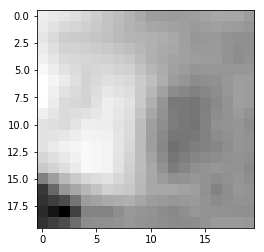

In [77]:
plt.imshow(imagest[0][0],cmap = 'gray')


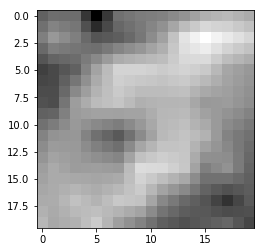

In [78]:
plt.imshow(imagesa[0][0],cmap = 'gray')

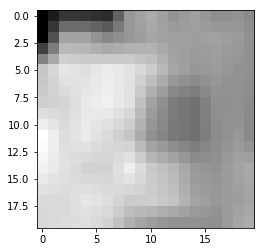

In [80]:
plt.imshow(imagess[0][0],cmap = 'gray')

In [29]:

METHOD = 'default'
lbp = local_binary_pattern(roi_t2w[2], 16, 2, METHOD)

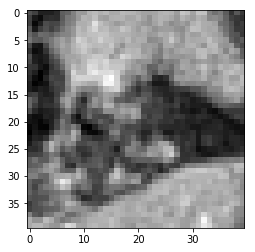

In [30]:
plt.imshow(roi_t2w[2],cmap = 'gray')

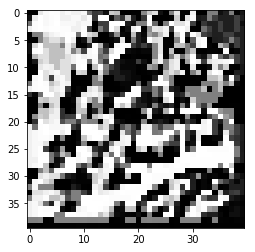

In [31]:
plt.imshow(lbp,cmap = 'gray')

In [50]:
root_path = '../../data/PROSTATEx'
path_to_data = '../../data/'
modality = 'adc'
new_spacing = (0.5,0.5,0.5)
orientation = 't'
patch_size = (28,28,1)


path_to_image = ppcs.get_path(row['ProxID'], modality, root_path)
fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path_to_image)
image = sitk.ReadImage(fixed_series_filenames)
# image = ppcs.resample_image_to_spacing(image, new_spacing, sitk.sitkBSpline)
# 
# center = [float(x) for x in row['pos'].split()] 
# volume  = ppcs.get_patch_from_image(image, patch_size, center, orientation)

In [51]:
print(image.GetSize())
print(image.GetSpacing())
print(image.GetOrigin())

(84, 128, 19)
(2.0, 2.0, 2.999999761581421)
(-71.29265594482422, -101.67921447753906, -5.4167399406433105)
